## Importando bibliotecas

In [51]:
import pickle
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Tratando a base

In [3]:
standard = StandardScaler()
encoder = OneHotEncoder(drop="first", sparse_output=False)
label = LabelEncoder()

In [4]:
df = pd.read_csv(r'C:\Users\marco\OneDrive\Documentos\Projetos\python_projects\diabetes_model\diabetes_prediction_dataset.csv')

In [5]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
encoder_array = encoder.fit_transform(df[["smoking_history"]])
encoder_array

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [9]:
encoder_df = pd.DataFrame(encoder_array, columns=encoder.get_feature_names_out(["smoking_history"]))
encoder_df

,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,1.0,0.0,0.0
99998,0.0,0.0,0.0,1.0,0.0


In [10]:
df_with_encoder = pd.concat([df, encoder_df], axis=1).drop(columns=["smoking_history"])

In [11]:
df_with_encoder.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')

In [12]:
x_df = df_with_encoder.drop(columns=['diabetes']).values
x_df

array([['Female', 80.0, 0, ..., 0.0, 1.0, 0.0],
       ['Female', 54.0, 0, ..., 0.0, 0.0, 0.0],
       ['Male', 28.0, 0, ..., 0.0, 1.0, 0.0],
       ...,
       ['Male', 66.0, 0, ..., 1.0, 0.0, 0.0],
       ['Female', 24.0, 0, ..., 0.0, 1.0, 0.0],
       ['Female', 57.0, 0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [13]:
y_df = df_with_encoder['diabetes'].values
y_df

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
x_df[0]

array(['Female', 80.0, 0, 1, 25.19, 6.6, 140, 0.0, 0.0, 0.0, 1.0, 0.0],
      dtype=object)

In [15]:
x_df[:, 0] = label.fit_transform(x_df[:, 0])

In [16]:
x_df

array([[0, 80.0, 0, ..., 0.0, 1.0, 0.0],
       [0, 54.0, 0, ..., 0.0, 0.0, 0.0],
       [1, 28.0, 0, ..., 0.0, 1.0, 0.0],
       ...,
       [1, 66.0, 0, ..., 1.0, 0.0, 0.0],
       [0, 24.0, 0, ..., 0.0, 1.0, 0.0],
       [0, 57.0, 0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [17]:
x_df[0]

array([0, 80.0, 0, 1, 25.19, 6.6, 140, 0.0, 0.0, 0.0, 1.0, 0.0],
      dtype=object)

In [18]:
x_df.shape

(100000, 12)

In [19]:
x_df

array([[0, 80.0, 0, ..., 0.0, 1.0, 0.0],
       [0, 54.0, 0, ..., 0.0, 0.0, 0.0],
       [1, 28.0, 0, ..., 0.0, 1.0, 0.0],
       ...,
       [1, 66.0, 0, ..., 1.0, 0.0, 0.0],
       [0, 24.0, 0, ..., 0.0, 1.0, 0.0],
       [0, 57.0, 0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.20, random_state=0)

In [21]:
x_train = standard.fit_transform(x_train)

In [22]:
x_test = standard.transform(x_test)

In [23]:
x_df_scaled = standard.fit_transform(x_df)

## Salvando separação em pkl

In [112]:
#with open('diabetes.pkl', 'wb') as f:
#    pickle.dump([x_train, x_test, y_train, y_test], f)

In [113]:
#with open('diabetes.pkl', 'rb') as f:
#    x_train, x_test, y_train, y_test = pickle.load(f)

## Treinando com algoritmos diferentes

### Naïve Bayes

In [114]:
naive_bayes = GaussianNB()

In [115]:
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [116]:
predicts = naive_bayes.predict(x_test)

In [117]:
accuracy_score(y_test, predicts) * 100

90.12

In [118]:
confusion_matrix(y_test, predicts)

array([[16901,  1396],
       [  580,  1123]])

### Árvores de Decisão

In [119]:
decision_tree = DecisionTreeClassifier()

In [120]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [121]:
predicts = decision_tree.predict(x_test)

In [122]:
accuracy_score(y_test, predicts) * 100

95.16

In [123]:
confusion_matrix(y_test, predicts)

array([[17773,   524],
       [  444,  1259]])

### Random Forest

In [124]:
random_forest = RandomForestClassifier()

In [125]:
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [126]:
predicts = random_forest.predict(x_test)

In [127]:
accuracy_score(y_test, predicts) * 100

97.045

In [128]:
confusion_matrix(y_test, predicts)

array([[18232,    65],
       [  526,  1177]])

### KNN

In [129]:
knn = KNeighborsClassifier()

In [130]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [131]:
predicts = knn.predict(x_test)

In [132]:
accuracy_score(predicts, y_test) * 100

96.095

In [133]:
confusion_matrix(y_test, predicts)

array([[18155,   142],
       [  639,  1064]])

### Regressão Logística

In [134]:
logistic_regression = LogisticRegression()

In [135]:
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [136]:
predicts = logistic_regression.predict(x_test)

In [137]:
accuracy_score(predicts, y_test) * 100

96.085

In [138]:
confusion_matrix(y_test, predicts)

array([[18114,   183],
       [  600,  1103]])

### SVM

In [139]:
support_vector_machine = SVC()

In [140]:
support_vector_machine.fit(x_train, y_train)

SVC()

In [141]:
predicts = support_vector_machine.predict(x_test)

In [142]:
accuracy_score(predicts, y_test) * 100

96.325

In [143]:
confusion_matrix(y_test, predicts)

array([[18271,    26],
       [  709,   994]])

### Redes Neurais

In [144]:
neural_network = MLPClassifier()

In [145]:
neural_network.fit(x_train, y_train)

MLPClassifier()

In [146]:
predicts = neural_network.predict(x_test)

In [147]:
accuracy_score(predicts, y_test) * 100

97.21499999999999

In [148]:
confusion_matrix(y_test, predicts)

array([[18262,    35],
       [  522,  1181]])

## Tuning com GridSearch

### Árvores de Decisão

In [149]:
params = {'splitter': ['best', 'random'],
              'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [150]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=4, verbose=True)
grid_search.fit(x_df_scaled, y_df)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=True)

In [151]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'random'}
0.97077


### Random Forest

In [152]:
params = {'criterion': ['gini', 'entropy'],
              'n_estimators': [100, 150],
              'min_samples_split': [5, 10],
              'min_samples_leaf': [5, 10]}

In [153]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=4, verbose=True)
grid_search.fit(x_df_scaled, y_df)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 150]},
             verbose=True)

In [154]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
0.97212


### KNN

In [155]:
params = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [156]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=4, verbose=True)
grid_search.fit(x_df_scaled, y_df)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 20], 'p': [1, 2]},
             verbose=True)

In [157]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 10, 'p': 2}
0.96074


### Regressão Logística

In [158]:
params = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [159]:
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=500), param_grid=params, cv=4, verbose=True)
grid_search.fit(x_df_scaled, y_df)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [1.0, 1.5, 2.0],
                         'solver': ['lbfgs', 'sag', 'saga'],
                         'tol': [0.0001, 1e-05, 1e-06]},
             verbose=True)

In [160]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.96027


### SVM

In [167]:
params = {'tol': [0.001, 0.0001],
              'C': [1.5, 2.0],
              'kernel': ['linear', 'sigmoid']}

In [168]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=params, cv=4, verbose=True, n_jobs=-1)
grid_search.fit(x_df_scaled, y_df)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1.5, 2.0], 'kernel': ['linear', 'sigmoid'],
                         'tol': [0.001, 0.0001]},
             verbose=True)

In [169]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 2.0, 'kernel': 'linear', 'tol': 0.0001}
0.96099


### Redes Neurais

In [164]:
params = {'activation': ['relu', 'logistic'],
              'solver': ['adam', 'sgd'],
              'batch_size': [200, 'auto'],
              'max_iter': [250, 500]}

In [165]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=params, cv=4, verbose=True, n_jobs=-1)
grid_search.fit(x_df_scaled, y_df)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


c:\Users\marco\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'batch_size': [200, 'auto'], 'max_iter': [250, 500],
                         'solver': ['adam', 'sgd']},
             verbose=True)

In [166]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'activation': 'relu', 'batch_size': 'auto', 'max_iter': 500, 'solver': 'adam'}
0.97212


## Validação Cruzada

In [55]:
resultados_gridsearch = pd.read_csv('resultados_gridsearch.csv')

In [23]:
arvore_lista = []
random_forest_lista = []
knn_lista = []
logistica_lista = []
svm_lista = []
rede_neural_lista = []

In [25]:
for i in range(10):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, min_samples_split=5, splitter='random')
  scores = cross_val_score(arvore, x_df_scaled, y_df, cv = kfold)
  arvore_lista.append(scores.mean())

  random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=5, min_samples_split=10, n_estimators=100)
  scores = cross_val_score(random_forest, x_df_scaled, y_df, cv = kfold)
  random_forest_lista.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, x_df_scaled, y_df, cv = kfold)
  knn_lista.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, x_df_scaled, y_df, cv = kfold)
  logistica_lista.append(scores.mean())

  svm = SVC()
  scores = cross_val_score(svm, x_df_scaled, y_df, cv = kfold)
  svm_lista.append(scores.mean())

  rede_neural = MLPClassifier()
  scores = cross_val_score(rede_neural, x_df_scaled, y_df, cv = kfold)
  rede_neural_lista.append(scores.mean())

0
1
2
3
4
5
6
7
8
9


In [29]:
resultados = pd.DataFrame({'Árvore': arvore_lista, 'Random Forest': random_forest_lista, 'KNN': knn_lista, 'Logística': logistica_lista, 'SVM': svm_lista, 'Redes Neurais': rede_neural_lista})

In [ ]:
resultados

,Árvore,Random Forest,KNN,Logística,SVM,Redes Neurais
0,0.97049,0.97198,0.96080,0.96030,0.96307,0.97188
1,0.97020,0.97195,0.96045,0.96029,0.96291,0.97174
2,0.97026,0.97194,0.96074,0.96026,0.96286,0.97143
3,0.97033,0.97190,0.96073,0.96029,0.96296,0.97187
4,0.97032,0.97190,0.96094,0.96027,0.96295,0.97161
5,0.97014,0.97199,0.96097,0.96028,0.96297,0.97151
6,0.97027,0.97198,0.96071,0.96034,0.96289,0.97155
7,0.97061,0.97190,0.96066,0.96027,0.96297,0.97166
8,0.97058,0.97195,0.96056,0.96043,0.96308,0.97189
9,0.96999,0.97195,0.96065,0.96025,0.96292,0.97177


In [31]:
resultados.to_csv('resultados_validacao_cruzada.csv')

## Teste de Hipótese

In [31]:
arvore_lista = resultados['Árvore'].to_list()
random_forest_lista = resultados['Random Forest'].to_list()
knn_lista = resultados['KNN'].to_list()
logistica_lista = resultados['Logística'].to_list()
svm_lista = resultados['SVM'].to_list()
rede_neural_lista = resultados['Redes Neurais'].to_list()

In [32]:
arvore_lista

[0.97049,
 0.9702000000000002,
 0.97026,
 0.97033,
 0.9703199999999998,
 0.97014,
 0.97027,
 0.97061,
 0.9705799999999998,
 0.96999]

In [33]:
_, p = f_oneway(arvore_lista, random_forest_lista, knn_lista, logistica_lista, svm_lista, rede_neural_lista)
p

np.float64(3.556837375366454e-86)

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada.')
else:
  print('Hipótese alternativa rejeitada.')

Hipótese nula rejeitada. Dados são diferentes


In [ ]:
kfold_resultados = pd.read_csv('kfold_resultados.csv')

In [49]:
kfold_resultados

,accuracy,algoritmo
0,0.97049,arvore
1,0.97020,arvore
2,0.97026,arvore
3,0.97033,arvore
4,0.97032,arvore
5,0.97014,arvore
6,0.97027,arvore
7,0.97061,arvore
8,0.97058,arvore
9,0.96999,arvore


In [52]:
comparacao_algoritmos = MultiComparison(kfold_resultados['accuracy'], kfold_resultados['algoritmo'])

In [53]:
teste_estatistico = comparacao_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0096    0.0 -0.0098 -0.0094   True
       arvore     logistica    -0.01    0.0 -0.0102 -0.0099   True
       arvore random_forest   0.0016    0.0  0.0015  0.0018   True
       arvore   rede_neural   0.0014    0.0  0.0012  0.0015   True
       arvore           svm  -0.0074    0.0 -0.0075 -0.0072   True
          knn     logistica  -0.0004    0.0 -0.0006 -0.0003   True
          knn random_forest   0.0112    0.0  0.0111  0.0114   True
          knn   rede_neural    0.011    0.0  0.0108  0.0111   True
          knn           svm   0.0022    0.0  0.0021  0.0024   True
    logistica random_forest   0.0116    0.0  0.0115  0.0118   True
    logistica   rede_neural   0.0114    0.0  0.0112  0.0116   True
    logistica           svm   0.0027    0.0  0.0025  0.0028   

In [60]:
resultados_gridsearch.mean()

Árvore           0.970319
Random Forest    0.971944
KNN              0.960721
Logística        0.960298
SVM              0.962958
Redes Neurais    0.971691
dtype: float64

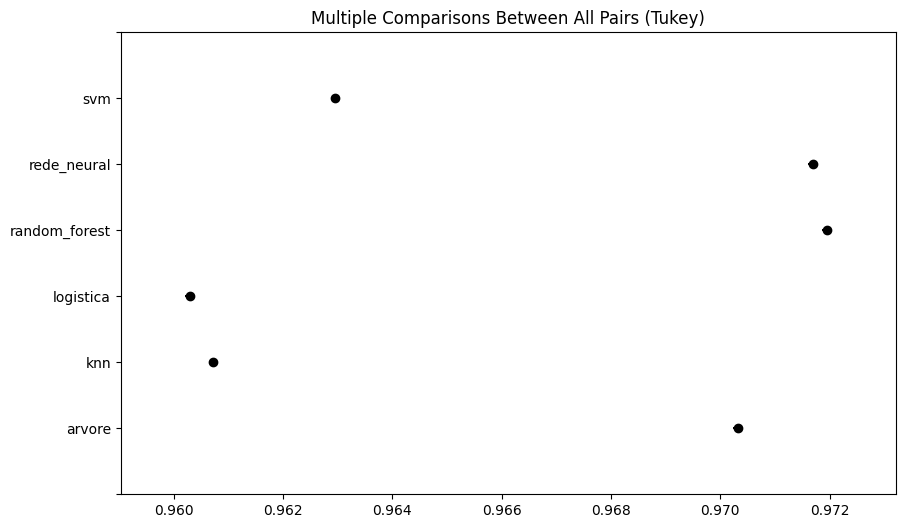

In [61]:
teste_estatistico.plot_simultaneous();